In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"youssefemad99","key":"c83b593ce22fab36108a01c090e90e78"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c street-view-getting-started-with-julia

  0% 0.00/48.0k [00:00<?, ?B/s]
100% 48.0k/48.0k [00:00<00:00, 42.2MB/s]
 61% 40.0M/65.4M [00:00<00:00, 156MB/s]
100% 65.4M/65.4M [00:00<00:00, 218MB/s]
  0% 0.00/7.34M [00:00<?, ?B/s]
100% 7.34M/7.34M [00:00<00:00, 118MB/s]
  0% 0.00/45.0k [00:00<?, ?B/s]
100% 45.0k/45.0k [00:00<00:00, 46.2MB/s]
  0% 0.00/7.41M [00:00<?, ?B/s]
100% 7.41M/7.41M [00:00<00:00, 68.3MB/s]
  0% 0.00/893 [00:00<?, ?B/s]
100% 893/893 [00:00<00:00, 883kB/s]
 75% 47.0M/63.0M [00:00<00:00, 77.3MB/s]
100% 63.0M/63.0M [00:00<00:00, 132MB/s] 
  0% 0.00/17.2k [00:00<?, ?B/s]
100% 17.2k/17.2k [00:00<00:00, 15.9MB/s]


In [ ]:
!unzip "/content/train.zip" -d "/content/train"

Streaming output truncated to the last 5000 lines.
 extracting: /content/train/train/2153.Bmp  
 extracting: /content/train/train/2154.Bmp  
 extracting: /content/train/train/2155.Bmp  
 extracting: /content/train/train/2156.Bmp  
  inflating: /content/train/train/2157.Bmp  
 extracting: /content/train/train/2158.Bmp  
 extracting: /content/train/train/2159.Bmp  
 extracting: /content/train/train/216.Bmp  
  inflating: /content/train/train/2160.Bmp  
 extracting: /content/train/train/2161.Bmp  
 extracting: /content/train/train/2162.Bmp  
 extracting: /content/train/train/2163.Bmp  
 extracting: /content/train/train/2164.Bmp  
 extracting: /content/train/train/2165.Bmp  
 extracting: /content/train/train/2166.Bmp  
 extracting: /content/train/train/2167.Bmp  
 extracting: /content/train/train/2168.Bmp  
 extracting: /content/train/train/2169.Bmp  
 extracting: /content/train/train/217.Bmp  
 extracting: /content/train/train/2170.Bmp  
 extracting: /content/train/train/2171.Bmp  
 extra



```
### **Randomly Opening some images to know the data**

```



In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from keras.constraints import maxnorm

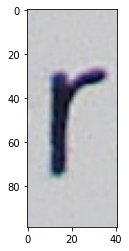

In [ ]:


plt.imshow(imread("/content/train/train/" + str(tf.random.uniform(shape=(), minval=1, maxval=6270, dtype=tf.int32).numpy())+".Bmp"))

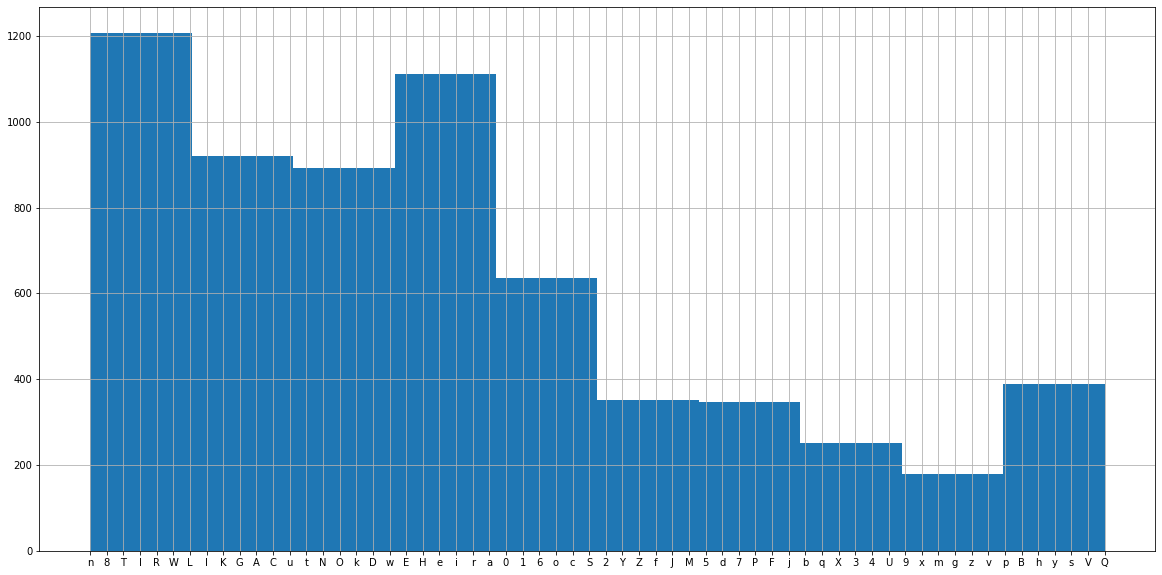

In [ ]:
#Get number of images for each class
train_labels = pd.read_csv("/content/trainLabels.csv")
train_labels["Class"].hist(figsize=(20,10))


In [ ]:
##ONE HOT ENCODING DATA, AND CHANGING IT INTO A 2D LIST
from sklearn.preprocessing import LabelBinarizer
list_of_labels = list(train_labels["Class"])
one_hot_data=pd.get_dummies(train_labels, prefix="")
one_hot_data = one_hot_data.drop(columns="ID")
y = LabelBinarizer().fit_transform(one_hot_data)
one_hot_data

,_0,_1,_2,_3,_4,_5,_6,_7,_8,_9,_A,_B,_C,_D,_E,_F,_G,_H,_I,_J,_K,_L,_M,_N,_O,_P,_Q,_R,_S,_T,_U,_V,_W,_X,_Y,_Z,_a,_b,_c,_d,_e,_f,_g,_h,_i,_j,_k,_l,_m,_n,_o,_p,_q,_r,_s,_t,_u,_v,_w,_x,_y,_z
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
IMG_LENGTH = 128
IMG_WIDTH = 128

In [ ]:
## SCALE IMAGE BETWEEN 0 AND 1 and resize to 224, then load them to training_data variable

X = []
for img in os.listdir("/content/train/train/"):
  loaded_img = cv2.imread(os.path.join("/content/train/train/", img))
  resized_img = cv2.resize(loaded_img, (IMG_LENGTH, IMG_WIDTH))
  gray_image = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  normalized_img = gray_image/255
  X.append(normalized_img)



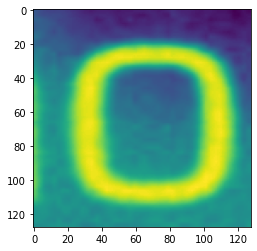

In [ ]:
plt.imshow(X[200])

In [ ]:
## split the training and test data
## SPLIT DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=42, shuffle = True)


## RESHAPE FROM 48,48 TO 48,48,1
X_train = np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
X_train = X_train.reshape(X_train.shape[0], IMG_LENGTH, IMG_WIDTH, 1)
X_test = X_test.reshape(X_test.shape[0], IMG_LENGTH, IMG_WIDTH, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train.shape


NameError: ignored

In [ ]:
## MODEL
learning_rate = 0.001
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(IMG_LENGTH, IMG_WIDTH, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides= (2,2), padding= 'valid'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides= (2,2), padding= 'valid'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())


model.add(layers.Flatten())

model.add(layers.Dense(100))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

model.add(layers.Dense(62))
model.add(layers.Activation('softmax'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

In [ ]:
batch_size = 32
epochs = 40

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, shuffle=True,validation_data=(X_test,y_test))
pd.DataFrame(history.history).plot()

In [ ]:
#model.predict(X_test[3])